## COVID-19 Xray Dataset (Train & Test Sets)
## with COVID-19 CNN Pneumonia Detector


## About Dataset
COVID-19 Xray Dataset (Train & Test Sets)
From: https://github.com/JordanMicahBennett/SMART-CT-SCAN_BASED-COVID19_VIRUS_DETECTOR/
The author of the above repository transformed the data from https://github.com/ieee8023/covid-chestxray-dataset
Background
The 2019 novel coronavirus (COVID-19) presents several unique features. While the diagnosis is confirmed using polymerase chain reaction (PCR), infected patients with pneumonia may present on chest X-ray and computed tomography (CT) images with a pattern that is only moderately characteristic for the human eye Ng, 2020. COVID-19’s rate of transmission depends on our capacity to reliably identify infected patients with a low rate of false negatives. In addition, a low rate of false positives is required to avoid further increasing the burden on the healthcare system by unnecessarily exposing patients to quarantine if that is not required. Along with proper infection control, it is evident that timely detection of the disease would enable the implementation of all the supportive care required by patients affected by COVID-19.

In late January, a Chinese team published a paper detailing the clinical and paraclinical features of COVID-19. They reported that patients present abnormalities in chest CT images with most having bilateral involvement Huang 2020. Bilateral multiple lobular and subsegmental areas of consolidation constitute the typical findings in chest CT images of intensive care unit (ICU) patients on admission Huang 2020. In comparison, non-ICU patients show bilateral ground-glass opacity and subsegmental areas of consolidation in their chest CT images Huang 2020. In these patients, later chest CT images display bilateral ground-glass opacity with resolved consolidation Huang 2020.

COVID is possibly better diagnosed using radiological imaging Fang, 2020 and Ai 2020.

## Citation
[1] Joseph Paul Cohen and Paul Morrison and Lan Dao. COVID-19 image data collection, arXiv, 2020. https://github.com/ieee8023/covid-chestxray-dataset

[2] https://github.com/JordanMicahBennett/SMART-CT-SCAN_BASED-COVID19_VIRUS_DETECTOR/

@article{cohen2020covid,
  title={COVID-19 image data collection},
  author={Joseph Paul Cohen and Paul Morrison and Lan Dao},
  journal={arXiv},
  url={https://github.com/ieee8023/covid-chestxray-dataset},
  year={2020}
}


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Analysis

In [ ]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_covid_path = "/content/drive/MyDrive/Covid/xray_dataset_covid19/train/PNEUMONIA/"
train_non_covid_path = "/content/drive/MyDrive/Covid/xray_dataset_covid19/train/NORMAL/"
test_covid_path = "/content/drive/MyDrive/Covid/xray_dataset_covid19/test/PNEUMONIA/"
test_non_covid_path = "/content/drive/MyDrive/Covid/xray_dataset_covid19/test/NORMAL/"

train_covid_count = len(os.listdir(train_covid_path))
train_non_covid_count = len(os.listdir(train_non_covid_path))
test_covid_count = len(os.listdir(test_covid_path))
test_non_covid_count = len(os.listdir(test_non_covid_path))

data = {
    "Dataset": ["Train", "Train", "Test", "Test"],
    "Class": ["COVID", "Non-COVID", "COVID", "Non-COVID"],
    "Count": [train_covid_count, train_non_covid_count, test_covid_count, test_non_covid_count]
}

df = pd.DataFrame(data)

print(df)


  Dataset      Class  Count
0   Train      COVID     74
1   Train  Non-COVID     74
2    Test      COVID     20
3    Test  Non-COVID     20


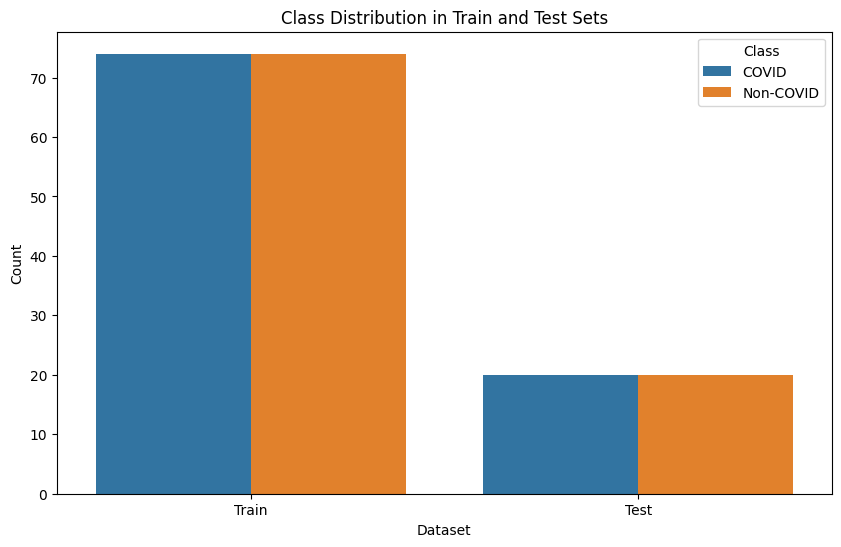

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Dataset", y="Count", hue="Class", data=df)
plt.title("Class Distribution in Train and Test Sets")
plt.show()

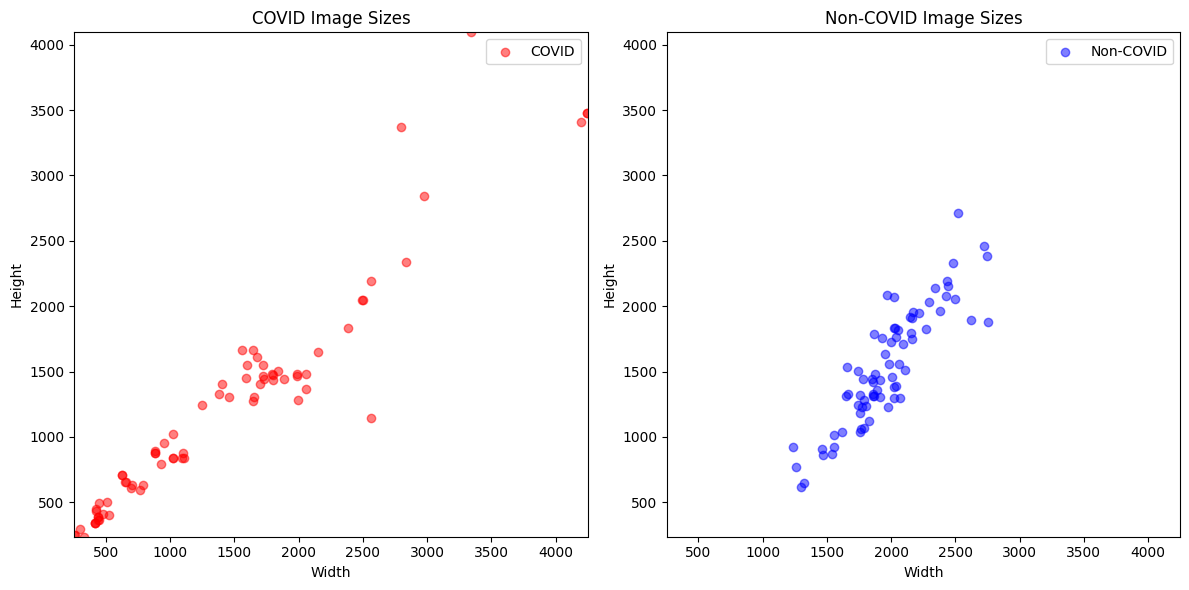

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def get_image_sizes(folder_path):
    sizes = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        with Image.open(img_path) as img:
            sizes.append(img.size)
    return sizes

train_covid_sizes = get_image_sizes(train_covid_path)
train_non_covid_sizes = get_image_sizes(train_non_covid_path)

covid_widths, covid_heights = zip(*train_covid_sizes)
non_covid_widths, non_covid_heights = zip(*train_non_covid_sizes)

min_width = min(min(covid_widths), min(non_covid_widths))
max_width = max(max(covid_widths), max(non_covid_widths))
min_height = min(min(covid_heights), min(non_covid_heights))
max_height = max(max(covid_heights), max(non_covid_heights))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(covid_widths, covid_heights, alpha=0.5, color='red', label='COVID')
plt.title("COVID Image Sizes")
plt.xlabel("Width")
plt.ylabel("Height")
plt.xlim(min_width, max_width)
plt.ylim(min_height, max_height)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(non_covid_widths, non_covid_heights, alpha=0.5, color='blue', label='Non-COVID')
plt.title("Non-COVID Image Sizes")
plt.xlabel("Width")
plt.ylabel("Height")
plt.xlim(min_width, max_width)
plt.ylim(min_height, max_height)
plt.legend()

plt.tight_layout()
plt.show()


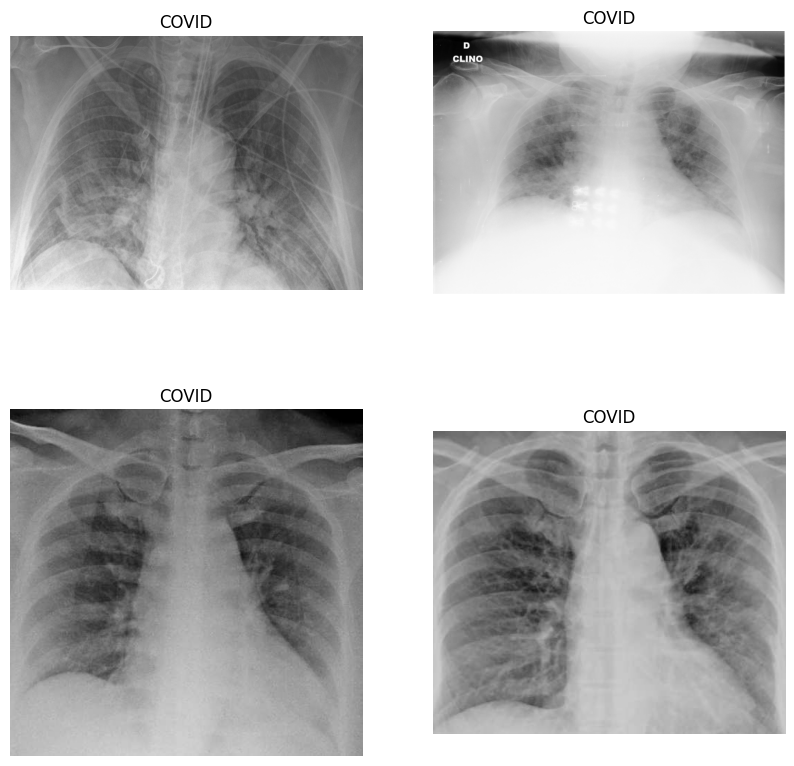

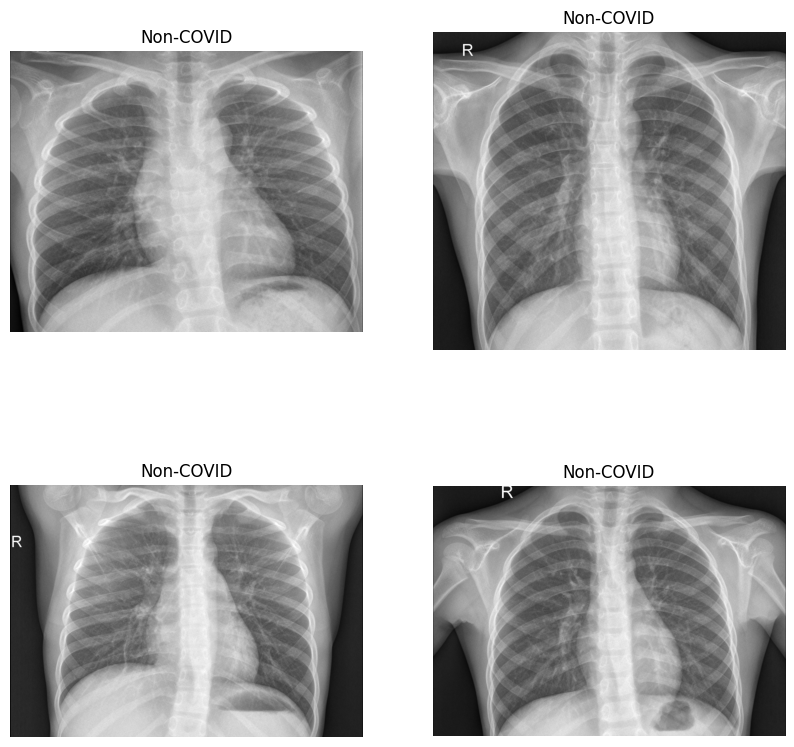

In [ ]:
def display_sample_images(folder_path, title):
    plt.figure(figsize=(10, 10))
    for i, img_name in enumerate(os.listdir(folder_path)[:4]):
        img_path = os.path.join(folder_path, img_name)
        with Image.open(img_path) as img:
            plt.subplot(2, 2, i + 1)
            plt.imshow(img, cmap="gray")
            plt.title(title)
            plt.axis("off")
    plt.show()

display_sample_images(train_covid_path, "COVID")
display_sample_images(train_non_covid_path, "Non-COVID")

## Part 1: Import Libraries


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import VGG16
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing.image import load_img, img_to_array

## Part 2: Data Augmentation and Preprocessing


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]
)

training_set = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Covid/xray_dataset_covid19/train/",
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/Covid/xray_dataset_covid19/test/",
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    shuffle=False
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


## Part 3: Transfer Learning with VGG16


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

## Part 4: Build the Model


In [ ]:
cnn = Sequential()
cnn.add(base_model)
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(Dropout(0.5))
cnn.add(Dense(1, activation='sigmoid'))

## Part 5: Compile the Model


In [ ]:
optimizer = Adam(learning_rate=0.0001)
cnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

## Part 6: Define Callbacks


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
learning_rate_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6)
checkpoint = ModelCheckpoint("/content/drive/MyDrive/models/best_model.keras", monitor='val_loss', save_best_only=True, verbose=1)
tensorboard_callback = TensorBoard(log_dir="./logs")

## Part 7: Train the Model


In [ ]:
history=cnn.fit(
    training_set,
    epochs=50,
    validation_data=test_set,
    callbacks=[early_stopping, learning_rate_scheduler, checkpoint, tensorboard_callback]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.5649 - loss: 0.9736 
Epoch 1: val_loss improved from inf to 0.89869, saving model to /content/drive/MyDrive/models/best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 151s 16s/step - accuracy: 0.5658 - loss: 0.9763 - val_accuracy: 0.5000 - val_loss: 0.8987 - learning_rate: 1.0000e-04
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.6160 - loss: 0.8640  
Epoch 2: val_loss improved from 0.89869 to 0.51185, saving model to /content/drive/MyDrive/models/best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 124s 12s/step - accuracy: 0.6178 - loss: 0.8614 - val_accuracy: 0.9000 - val_loss: 0.5119 - learning_rate: 1.0000e-04
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9045 - loss: 0.5389
Epoch 3: val_loss improved from 0.51185 to 0.47276, saving model to /content/drive/MyDrive/models/best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 142s 13s/step - accuracy: 0.9015 - loss: 0.5409 - val_accuracy: 0.9500 - val_loss: 0.472

## Part 8: Save the Model


In [ ]:
cnn.save('/content/drive/MyDrive/models/final_model.keras')

## Part 9: Evaluation Model

## 1. Model Evaluation


In [ ]:
test_set.reset()
loss, accuracy = cnn.evaluate(test_set)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 7s/step - accuracy: 0.9641 - loss: 0.2028
Test Loss: 0.19030167162418365
Test Accuracy: 0.9750000238418579


## 2. Predictions and Classification Report

In [ ]:
predictions = cnn.predict(test_set)
predicted_classes = (predictions >= 0.5).astype(int).flatten()
true_classes = test_set.classes

print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=test_set.class_indices.keys()))


3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 8s/step

Classification Report:
              precision    recall  f1-score   support

      NORMAL       1.00      0.95      0.97        20
   PNEUMONIA       0.95      1.00      0.98        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



## 3. Confusion Matrix


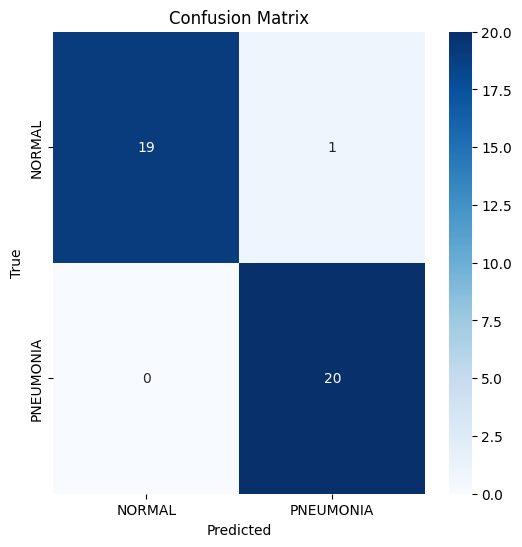

In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_set.class_indices.keys(),
            yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## 4. ROC Curve


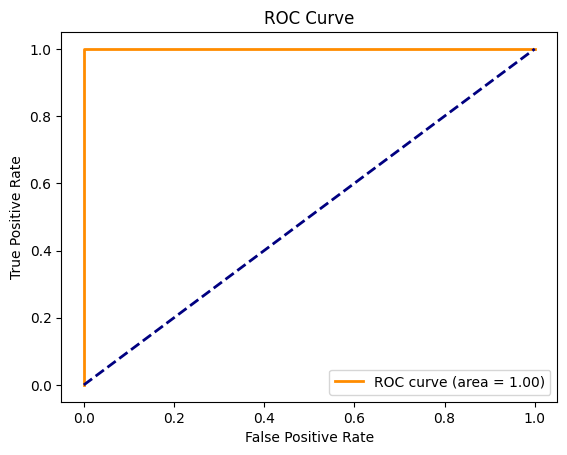

In [ ]:
fpr, tpr, thresholds = roc_curve(true_classes, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## 5. Class Labels Mapping


In [ ]:
class_labels = {v: k for k, v in test_set.class_indices.items()}

## 6. Log Loss (Cross-Entropy Loss)

In [ ]:
from sklearn.metrics import log_loss

logloss = log_loss(true_classes, predictions)
print(f"Log Loss: {logloss:.2f}")

Log Loss: 0.08


## 6. Area Under the Precision-Recall Curve (AUC-PR)


In [ ]:
from sklearn.metrics import average_precision_score

auc_pr = average_precision_score(true_classes, predictions)
print(f"Area Under the Precision-Recall Curve (AUC-PR): {auc_pr:.2f}")


Area Under the Precision-Recall Curve (AUC-PR): 1.00


## 7. Matthews Correlation Coefficient (MCC)

In [ ]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(true_classes, predicted_classes)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")


Matthews Correlation Coefficient (MCC): 0.95


## 8. Cohen's Kappa

In [ ]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(true_classes, predicted_classes)
print(f"Cohen's Kappa Score: {kappa:.2f}")


Cohen's Kappa Score: 0.95


## 9. Image Prediction and Display

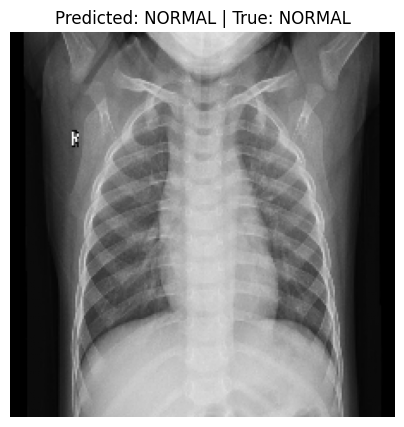

Image Path: NORMAL/NORMAL2-IM-0035-0001.jpeg --> Predicted: NORMAL, True: NORMAL


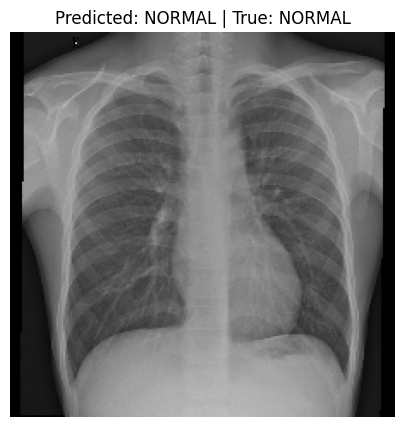

Image Path: NORMAL/NORMAL2-IM-0052-0001.jpeg --> Predicted: NORMAL, True: NORMAL


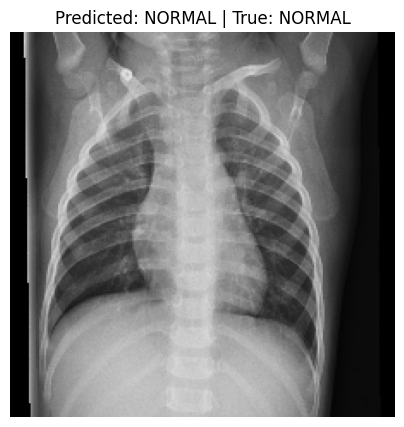

Image Path: NORMAL/NORMAL2-IM-0058-0001.jpeg --> Predicted: NORMAL, True: NORMAL


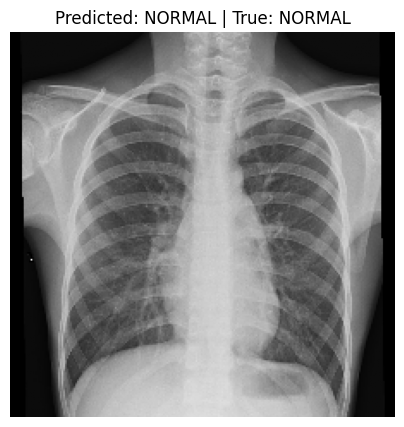

Image Path: NORMAL/NORMAL2-IM-0059-0001.jpeg --> Predicted: NORMAL, True: NORMAL


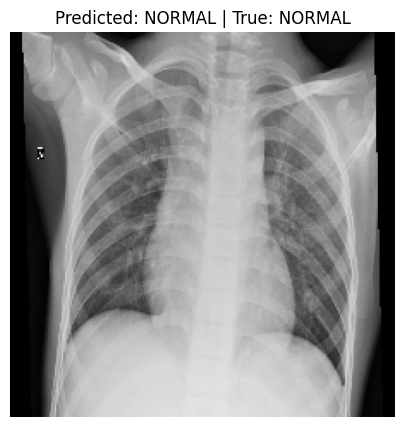

Image Path: NORMAL/NORMAL2-IM-0072-0001.jpeg --> Predicted: NORMAL, True: NORMAL


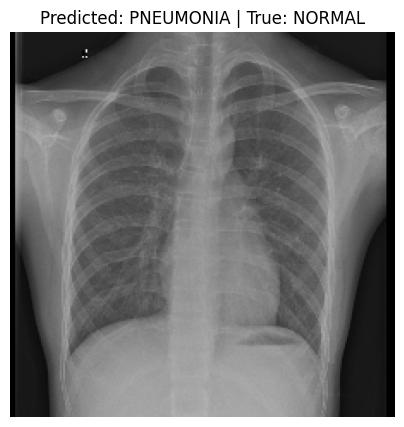

Image Path: NORMAL/NORMAL2-IM-0073-0001.jpeg --> Predicted: PNEUMONIA, True: NORMAL


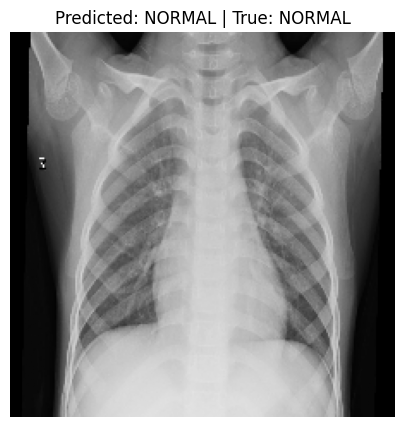

Image Path: NORMAL/NORMAL2-IM-0092-0001.jpeg --> Predicted: NORMAL, True: NORMAL


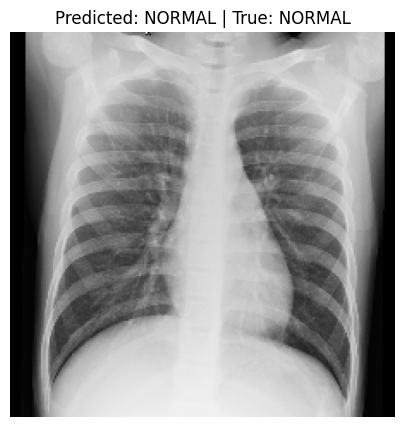

Image Path: NORMAL/NORMAL2-IM-0105-0001.jpeg --> Predicted: NORMAL, True: NORMAL


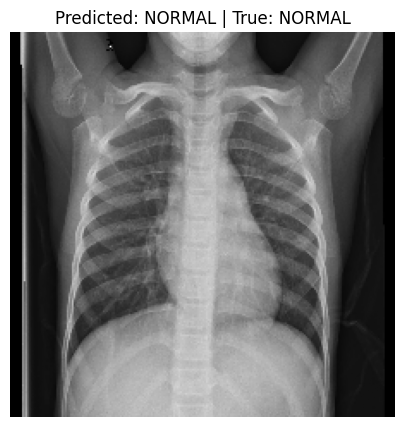

Image Path: NORMAL/NORMAL2-IM-0110-0001.jpeg --> Predicted: NORMAL, True: NORMAL


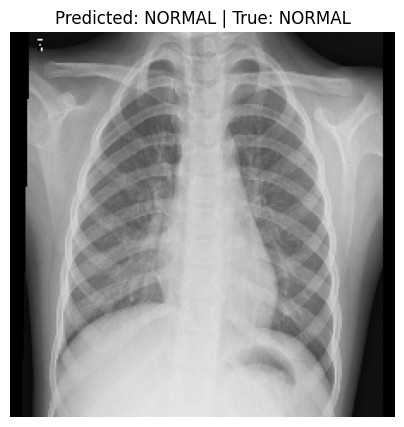

Image Path: NORMAL/NORMAL2-IM-0111-0001.jpeg --> Predicted: NORMAL, True: NORMAL


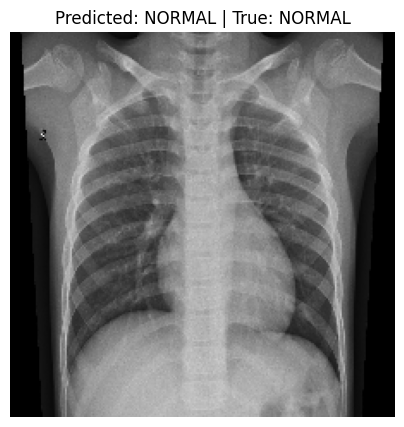

Image Path: NORMAL/NORMAL2-IM-0112-0001.jpeg --> Predicted: NORMAL, True: NORMAL


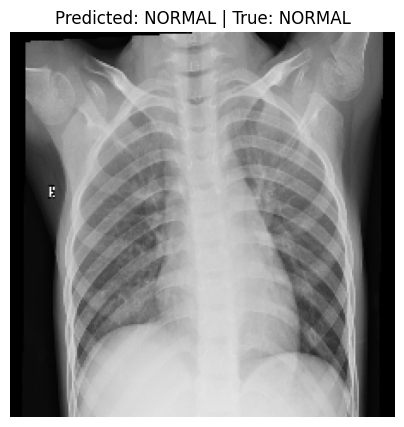

Image Path: NORMAL/NORMAL2-IM-0117-0001.jpeg --> Predicted: NORMAL, True: NORMAL


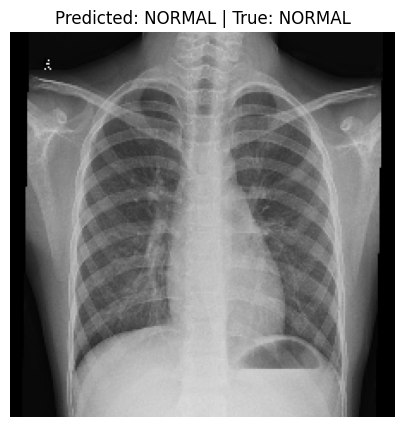

Image Path: NORMAL/NORMAL2-IM-0120-0001.jpeg --> Predicted: NORMAL, True: NORMAL


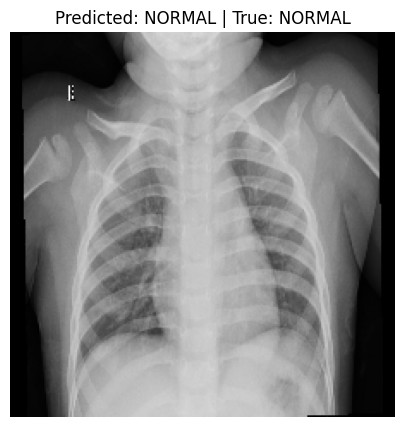

Image Path: NORMAL/NORMAL2-IM-0123-0001.jpeg --> Predicted: NORMAL, True: NORMAL


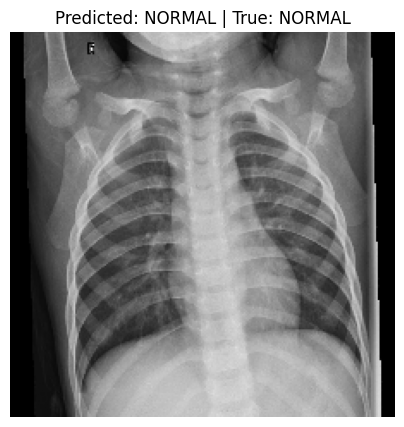

Image Path: NORMAL/NORMAL2-IM-0130-0001.jpeg --> Predicted: NORMAL, True: NORMAL


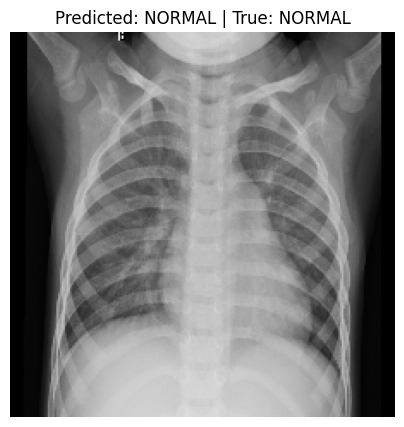

Image Path: NORMAL/NORMAL2-IM-0131-0001.jpeg --> Predicted: NORMAL, True: NORMAL


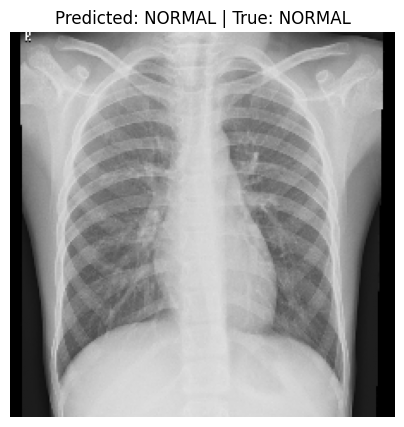

Image Path: NORMAL/NORMAL2-IM-0132-0001.jpeg --> Predicted: NORMAL, True: NORMAL


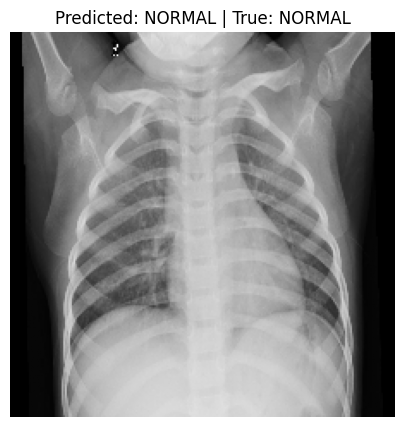

Image Path: NORMAL/NORMAL2-IM-0139-0001.jpeg --> Predicted: NORMAL, True: NORMAL


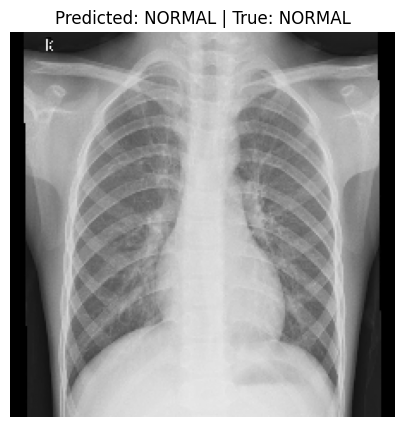

Image Path: NORMAL/NORMAL2-IM-0145-0001.jpeg --> Predicted: NORMAL, True: NORMAL


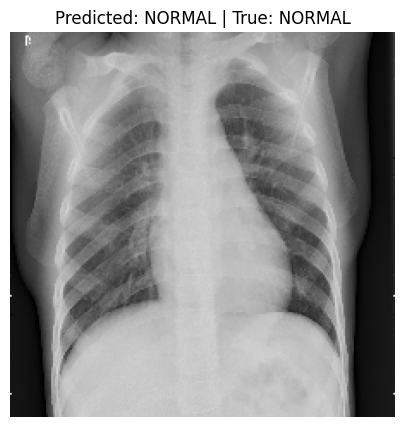

Image Path: NORMAL/NORMAL2-IM-0171-0001.jpeg --> Predicted: NORMAL, True: NORMAL


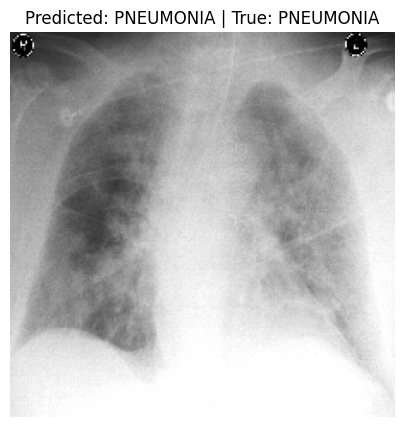

Image Path: PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg --> Predicted: PNEUMONIA, True: PNEUMONIA


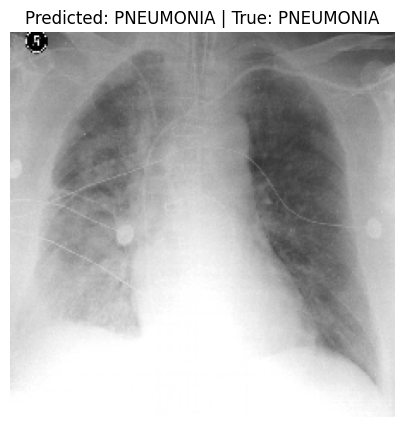

Image Path: PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg --> Predicted: PNEUMONIA, True: PNEUMONIA


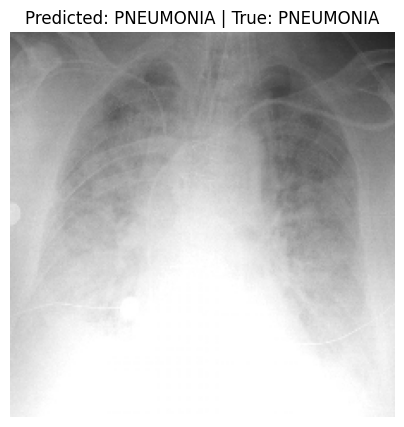

Image Path: PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10.jpeg --> Predicted: PNEUMONIA, True: PNEUMONIA


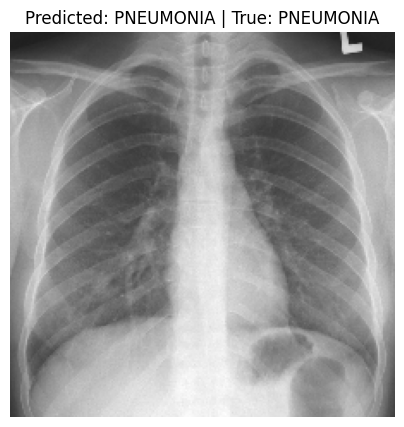

Image Path: PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg --> Predicted: PNEUMONIA, True: PNEUMONIA


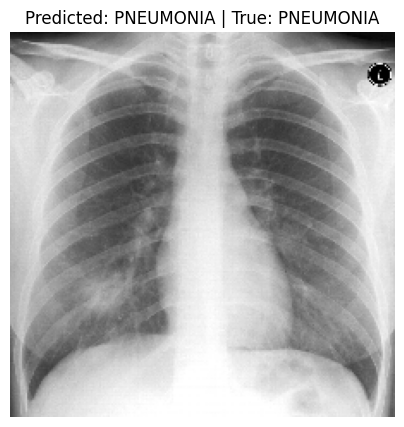

Image Path: PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg --> Predicted: PNEUMONIA, True: PNEUMONIA


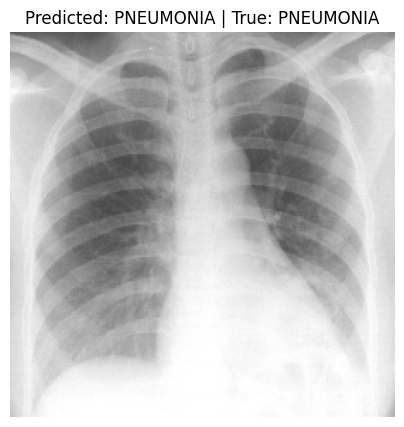

Image Path: PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9.jpeg --> Predicted: PNEUMONIA, True: PNEUMONIA


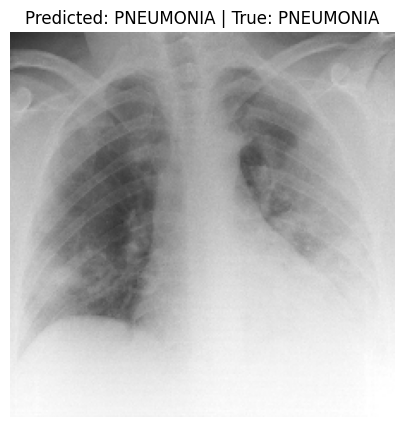

Image Path: PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day5.jpeg --> Predicted: PNEUMONIA, True: PNEUMONIA


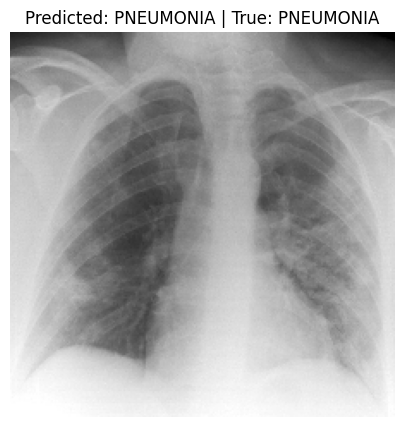

Image Path: PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day12.jpeg --> Predicted: PNEUMONIA, True: PNEUMONIA


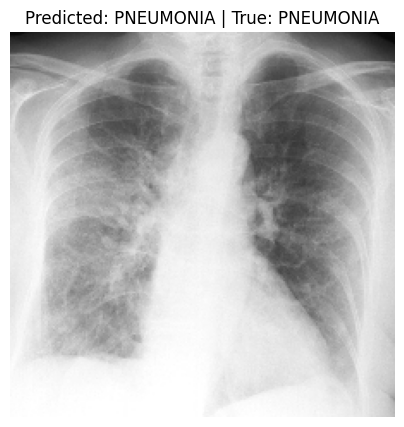

Image Path: PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg --> Predicted: PNEUMONIA, True: PNEUMONIA


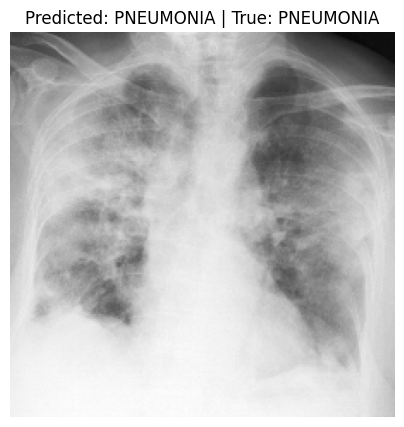

Image Path: PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day19.jpeg --> Predicted: PNEUMONIA, True: PNEUMONIA


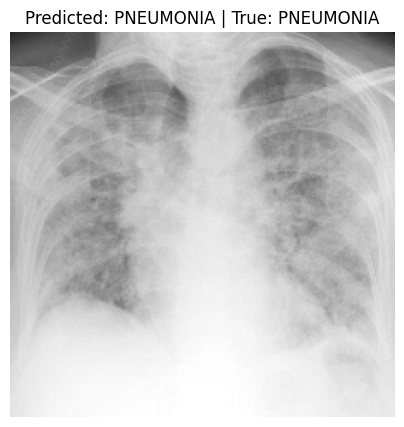

Image Path: PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day27.jpeg --> Predicted: PNEUMONIA, True: PNEUMONIA


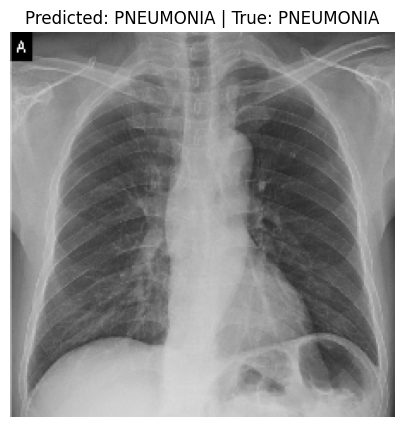

Image Path: PNEUMONIA/ryct.2020200034.fig2.jpeg --> Predicted: PNEUMONIA, True: PNEUMONIA


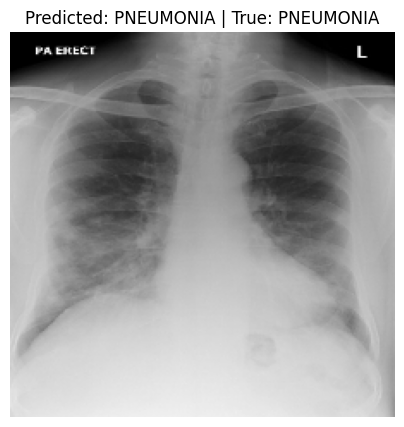

Image Path: PNEUMONIA/ryct.2020200034.fig5-day0.jpeg --> Predicted: PNEUMONIA, True: PNEUMONIA


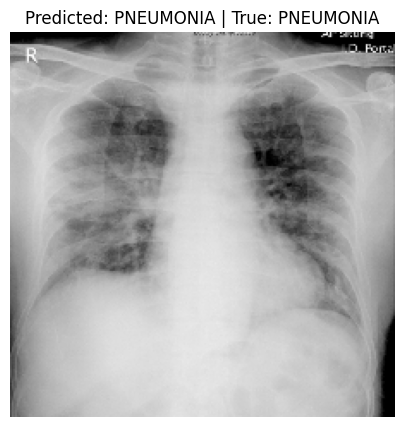

Image Path: PNEUMONIA/ryct.2020200034.fig5-day4.jpeg --> Predicted: PNEUMONIA, True: PNEUMONIA


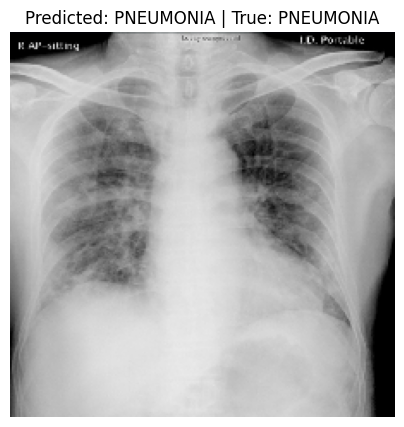

Image Path: PNEUMONIA/ryct.2020200034.fig5-day7.jpeg --> Predicted: PNEUMONIA, True: PNEUMONIA


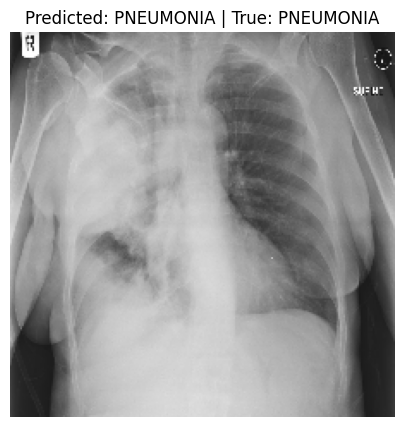

Image Path: PNEUMONIA/streptococcus-pneumoniae-pneumonia-1.jpg --> Predicted: PNEUMONIA, True: PNEUMONIA


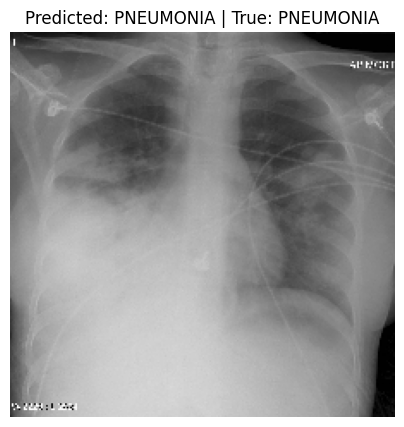

Image Path: PNEUMONIA/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day0.jpg --> Predicted: PNEUMONIA, True: PNEUMONIA


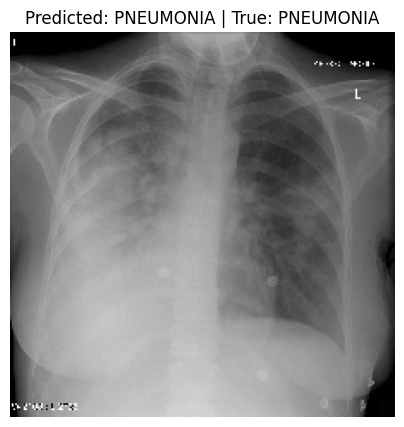

Image Path: PNEUMONIA/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day1.jpg --> Predicted: PNEUMONIA, True: PNEUMONIA


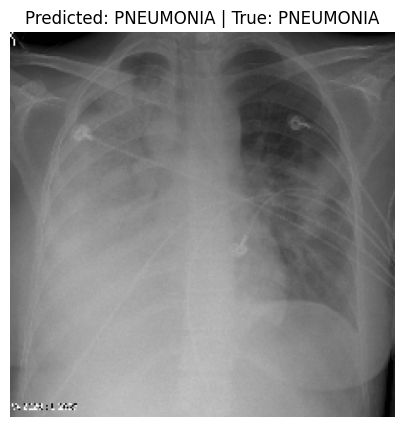

Image Path: PNEUMONIA/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day2.jpg --> Predicted: PNEUMONIA, True: PNEUMONIA


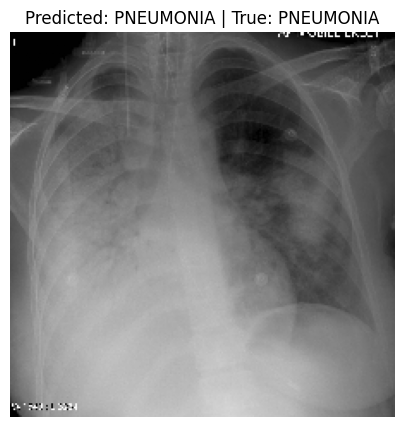

Image Path: PNEUMONIA/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg --> Predicted: PNEUMONIA, True: PNEUMONIA


In [ ]:
for i, (prediction, image_path) in enumerate(zip(predicted_classes, test_set.filenames)):
    img = load_img(f"/content/drive/MyDrive/Covid/xray_dataset_covid19/test/{image_path}", target_size=(224, 224))
    img_array = img_to_array(img)

    true_label = 'NORMAL' if 'NORMAL' in image_path.upper() else 'PNEUMONIA' if 'PNEUMONIA' in image_path.upper() else 'UNKNOWN'
    predicted_label = class_labels[int(prediction)]

    if true_label.upper() != predicted_label.upper():
        print(f"Warning: Mismatch! Image: {image_path} --> Predicted: {predicted_label}, True: {true_label}")

    plt.figure(figsize=(5, 5))
    plt.imshow(img_array.astype('uint8') / 255.0)
    plt.title(f"Predicted: {predicted_label} | True: {true_label}")
    plt.axis('off')
    plt.show()

    print(f"Image Path: {image_path} --> Predicted: {predicted_label}, True: {true_label}")


# ✨ **Finish** ✨
---
*Great job! You've completed it!*


In [5]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00


In [17]:
! wget -q -O - ipv4.icanhazip.com

34.81.246.191


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




⠙
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.81.246.191:8501

⠹⠸⠼⠴⠦⠧your url is: https://clean-trees-exist.loca.lt
2025-02-28 14:21:34.479240: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740752494.508167   18080 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740752494.516475   18080 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-28 14:21:34.544865: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the follow